### Author:REVATHY REMESH

### GRIPJULY21-The Spark Foundation-Data Science & Business Analytics Internship

### Task1:Prediction using Supervised ML

#### Problem Statement: 
We have to predict the percentage of an student based on the number of study hours and to calculate the 
predicted score if a student studies for 9.25hours/day

## Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

### Importing Dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Perform EDA (Exploratory Data Analysis)

The basic steps of EDA are:

. Understand the dataset

1.Identifying the number of features or columns

2.Identifying the features or columns

3.Identify the size of the dataset

4.Identifying the data types of features

5.Checking if the dataset has empty cells

6.Identifying the number of empty cells by features or columns


. Handling Missing Values and Outliers

. Encoding Categorical variables

. Graphical Univariate Analysis, Bivariate

. Normalization and Scaling

In [3]:
print("Number of rows:",df.shape[0])# # identify the size of of the dataset
print("Number of columns:",df.shape[1])

Number of rows: 25
Number of columns: 2


In [4]:
df.info()# identify the number of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [6]:
df.isnull().values.any() # checking if dataset has empty cells

False

In [7]:
df.dtypes # identify the datatypes of the features

Hours     float64
Scores      int64
dtype: object

Our dataset has two columns: Hours, Scores.one is float datatype and other is int datatype. We have 25 records and no null-values or outliers in our dataset.

## Graphical Univariate and Bivariate Analysis





Lets now visualize the  data to see any relationship with each other.

Text(0.5, 1.0, "Histogram of 'Scores'")

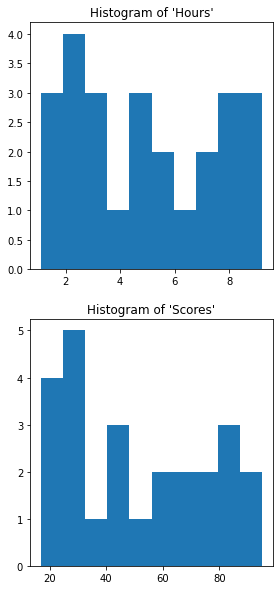

In [8]:
#Univariate Analysis
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df['Hours'], density=False)
plt.title("Histogram of 'Hours'")
plt.subplot(2,4,5)
plt.hist(df['Scores'], density=False)
plt.title("Histogram of 'Scores'")

From the above graphical representations, we can say there are no outliers in our data, and 'Hours'and Scores looks like normally distributed

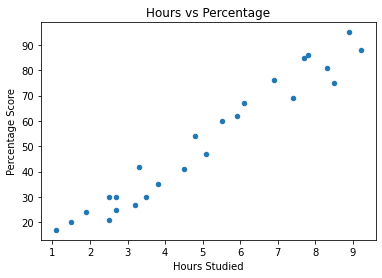

In [9]:
#Bivariate Analysis
#scatterplot
df.plot.scatter(x = 'Hours', y = 'Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


from the above gragh ,we can infer that there is a linear relationship holds between two variable

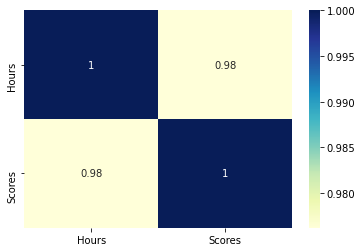

In [10]:
#Heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from  the heatmap, the variable "Scores" seems to be correlated with "Hours". So let's go ahead and perform simple linear regression.

## Performing Simple Linear Regression


### Linear Regression model building using 'sklearn'

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Scores`, to the variable `y`.

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values   

### Spliting the data into Train and Test

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, 
                            test_size=0.2, random_state=0) 

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


### Building the regression model

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # Instantiating the LinearRegression object
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
print(lm.intercept_)
print(lm.coef_)

2.018160041434683
[9.91065648]


In [16]:

y_pred_train = lm.predict(X_train)

In [17]:
r2_score(y_train , y_pred_train)

0.9515510725211552

In [18]:
# Plotting the regression line
line=lm.intercept_+(X_train*lm.coef_)

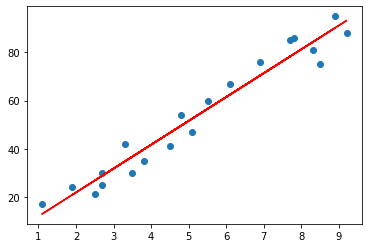

In [19]:
# Visualizing the model fit
plt.scatter(X_train, y_train)
plt.plot(X_train,line , 'r')
plt.show()

## Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data.

In [20]:
# Predictions on the basis of the model
y_pred_test = lm.predict(X_test)

print(y_pred_test)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [21]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# Find the value of r squared
r2_score(y_test , y_pred_test)

0.9454906892105356

We achieved 94.5% accuracy using scikit-learn but there is not much scope to understand the in-depth insights about the relevance of features from this model

In [23]:
line2=lm.intercept_+(X_test*lm.coef_)

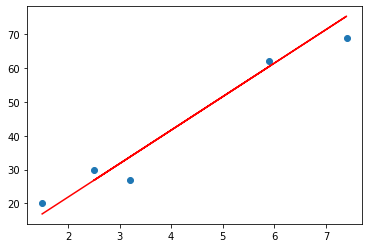

In [24]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test,line2, 'r')
plt.show()

In [25]:
#  test with  own data
hours = 9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred_test)) 

Mean Absolute Error: 4.183859899002975


### Conclusion:

       After analysing the dataset we got predicted score around 93.6 based on the number of study hours i.e,9.25hrs/day